# Program Algorithm
1. Capital Initialization: IDR 25,000,000
2. Input Data: Take January exchange rate data (30 data) for AUD, PGK, and VND.
3. February Prediction:
    - Use a moving average (e.g. 5-day MA) to predict the exchange rate for each day in February.
4. Trade Simulation:
    - Every day in February, choose an exchange strategy between currencies to maximize the value of IDR at the end of the month.
    - Transactions are limited to a maximum of 3 foreign currencies.
    - May swap daily, e.g. sell AUD → buy PGK, etc.
5. Calculation & Plot:
    - Save the remaining money each day (either in IDR or forex).
    - Plot daily exchange rate & financial condition.
6. Output: Remaining money in IDR at the end of February.

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

In [165]:
# Read file currencies
df = pd.read_excel("Exchange Rates On Transaction.xlsx")

In [166]:
# Show the first 5 rows of AUD (Australian Dollar) currency
df.head()

,NO,Value,EUR to IDR,USD to IDR,AUD to IDR,Date
0,238,1,16997.84,15361.81,10496.72,1/2/2024 12:00:00 AM
1,237,1,16966.00,15395.64,10504.45,1/3/2024 12:00:00 AM
2,236,1,16899.14,15417.52,10419.16,1/4/2024 12:00:00 AM
3,235,1,16890.17,15447.38,10428.53,1/5/2024 12:00:00 AM
4,234,1,16860.93,15440.41,10343.53,1/8/2024 12:00:00 AM


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NO          238 non-null    int64  
 1   Value       238 non-null    int64  
 2   EUR to IDR  238 non-null    float64
 3   USD to IDR  238 non-null    float64
 4   AUD to IDR  238 non-null    float64
 5   Date        238 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 11.3+ KB


In [168]:
df.describe()

,NO,Value,EUR to IDR,USD to IDR,AUD to IDR
count,238.000000,238.0,238.000000,238.000000,238.000000
mean,119.500000,1.0,17069.891092,15767.665042,10414.450882
std,68.848868,0.0,289.373400,323.819815,223.279853
min,1.000000,1.0,16494.990000,15016.540000,10026.620000
25%,60.250000,1.0,16841.325000,15528.220000,10254.430000
50%,119.500000,1.0,17000.080000,15730.455000,10355.020000
75%,178.750000,1.0,17292.815000,16079.942500,10542.522500
max,238.000000,1.0,17616.510000,16375.710000,10923.090000


In [169]:
df['Date'] = pd.to_datetime(df['Date'])
df_sorted = df.sort_values('Date').reset_index(drop=True)

C:\Users\husai\AppData\Local\Temp\ipykernel_11348\4245740988.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [170]:
df_sorted

,NO,Value,EUR to IDR,USD to IDR,AUD to IDR,Date
0,238,1,16997.84,15361.81,10496.72,2024-01-02
1,237,1,16966.00,15395.64,10504.45,2024-01-03
2,236,1,16899.14,15417.52,10419.16,2024-01-04
3,235,1,16890.17,15447.38,10428.53,2024-01-05
4,234,1,16860.93,15440.41,10343.53,2024-01-08
...,...,...,...,...,...,...
233,5,1,16807.06,16188.65,10109.81,2024-12-23
234,4,1,16740.62,16078.20,10044.05,2024-12-24
235,3,1,16754.30,16126.96,10061.61,2024-12-27
236,2,1,16850.50,16169.75,10057.58,2024-12-30


In [171]:
df_rates = df_sorted[['Date', 'AUD to IDR', 'USD to IDR', 'EUR to IDR']]
df_rates.columns = ['Date', 'AUD', 'USD', 'EUR']
df_rates

,Date,AUD,USD,EUR
0,2024-01-02,10496.72,15361.81,16997.84
1,2024-01-03,10504.45,15395.64,16966.00
2,2024-01-04,10419.16,15417.52,16899.14
3,2024-01-05,10428.53,15447.38,16890.17
4,2024-01-08,10343.53,15440.41,16860.93
...,...,...,...,...
233,2024-12-23,10109.81,16188.65,16807.06
234,2024-12-24,10044.05,16078.20,16740.62
235,2024-12-27,10061.61,16126.96,16754.30
236,2024-12-30,10057.58,16169.75,16850.50


In [172]:
ma3 = df_rates[['AUD', 'USD', 'EUR']].rolling(window=3).mean()
ma3

,AUD,USD,EUR
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,10473.443333,15391.656667,16954.326667
3,10450.713333,15420.180000,16918.436667
4,10397.073333,15435.103333,16883.413333
...,...,...,...
233,10107.493333,16134.586667,16818.823333
234,10083.940000,16154.153333,16794.340000
235,10071.823333,16131.270000,16767.326667
236,10054.413333,16124.970000,16781.806667


In [173]:
ma3 = ma3.dropna().reset_index(drop=True)
ma3

,AUD,USD,EUR
0,10473.443333,15391.656667,16954.326667
1,10450.713333,15420.180000,16918.436667
2,10397.073333,15435.103333,16883.413333
3,10373.266667,15444.060000,16883.450000
4,10346.993333,15441.736667,16890.686667
...,...,...,...
231,10107.493333,16134.586667,16818.823333
232,10083.940000,16154.153333,16794.340000
233,10071.823333,16131.270000,16767.326667
234,10054.413333,16124.970000,16781.806667


In [174]:
predicted_january = ma3.copy()
predicted_january

,AUD,USD,EUR
0,10473.443333,15391.656667,16954.326667
1,10450.713333,15420.180000,16918.436667
2,10397.073333,15435.103333,16883.413333
3,10373.266667,15444.060000,16883.450000
4,10346.993333,15441.736667,16890.686667
...,...,...,...
231,10107.493333,16134.586667,16818.823333
232,10083.940000,16154.153333,16794.340000
233,10071.823333,16131.270000,16767.326667
234,10054.413333,16124.970000,16781.806667


In [175]:
# Predict 28 days using rolling mean of last 3 rows
for _ in range(28 - len(predicted_january)):
    next_row = predicted_january.iloc[-3:].mean()
    predicted_january = pd.concat([predicted_january, pd.DataFrame([next_row])], ignore_index=True)

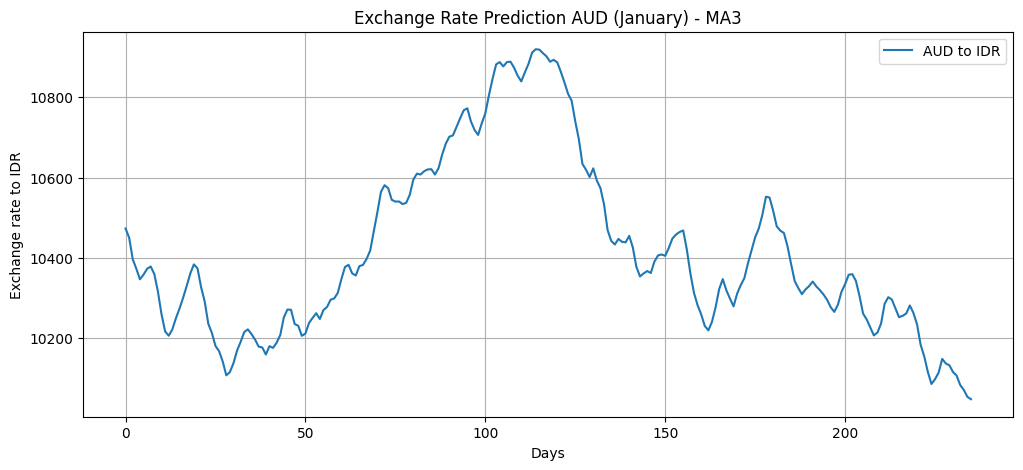

In [176]:
# Plotting exchange AUD rate curves
plt.figure(figsize=(12,5))
plt.plot(predicted_january['AUD'], label='AUD to IDR')
plt.title("Exchange Rate Prediction AUD (January) - MA3")
plt.xlabel('Days')
plt.ylabel('Exchange rate to IDR')
plt.legend()
plt.grid(True)
plt.show()

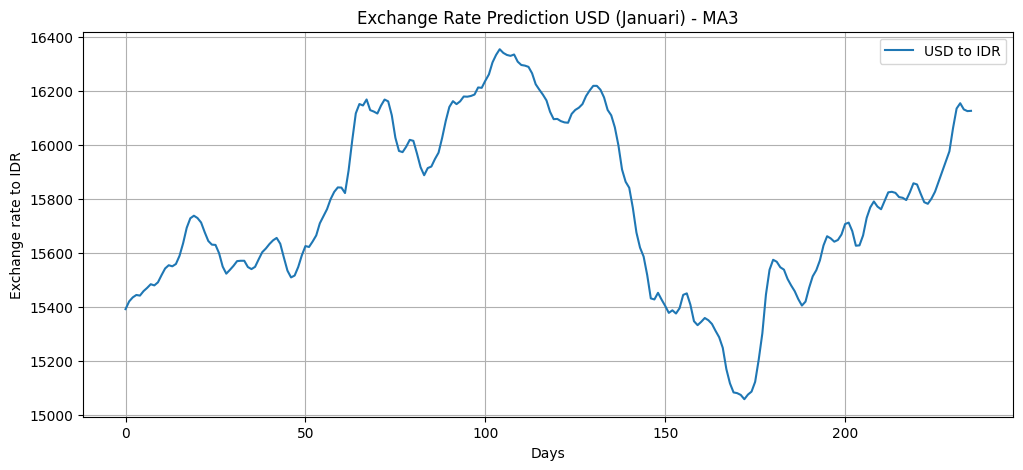

In [177]:
# Plotting exchange USD rate curves
plt.figure(figsize=(12,5))
plt.plot(predicted_january['USD'], label='USD to IDR')
plt.title("Exchange Rate Prediction USD (Januari) - MA3")
plt.xlabel('Days')
plt.ylabel('Exchange rate to IDR')
plt.legend()
plt.grid(True)
plt.show()

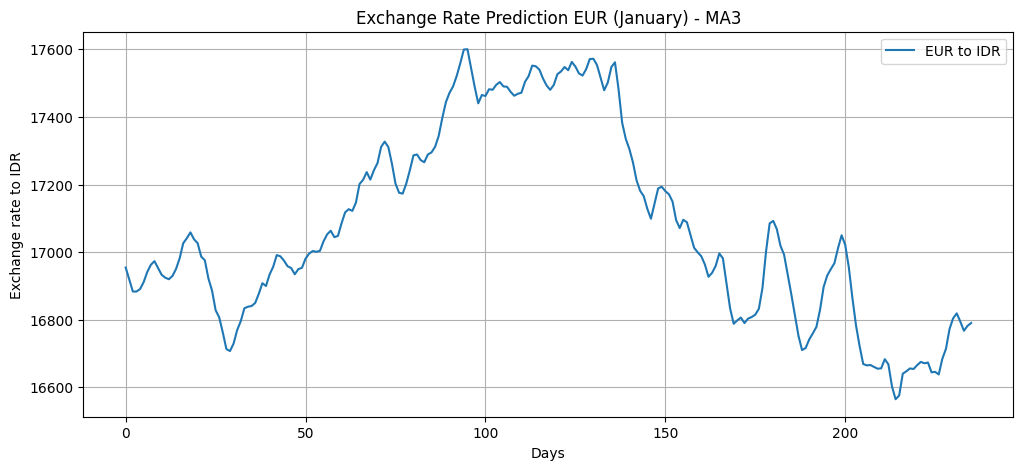

In [178]:
# Plotting exchange EUR rate curves
plt.figure(figsize=(12,5))
plt.plot(predicted_january['EUR'], label='EUR to IDR')
plt.title("Exchange Rate Prediction EUR (January) - MA3")
plt.xlabel('Days')
plt.ylabel('Exchange rate to IDR')
plt.legend()
plt.grid(True)
plt.show()

In [179]:
# Simulate investment starting with 25 million IDR in AUD
initial_idr = 25_000_000
idr_values = []
aud_values = []

In [180]:
# Day 1 conversion to PGK
aud_amount = initial_idr / predicted_january.loc[0, 'AUD']
aud_values.append(aud_amount)
idr_values.append(initial_idr)

In [181]:
# Each day, keep value in PGK, recalculate equivalent IDR
for i in range(1, 31):
    idr_value = aud_amount * predicted_january.loc[i, 'AUD']
    idr_values.append(idr_value)
    aud_values.append(aud_amount)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


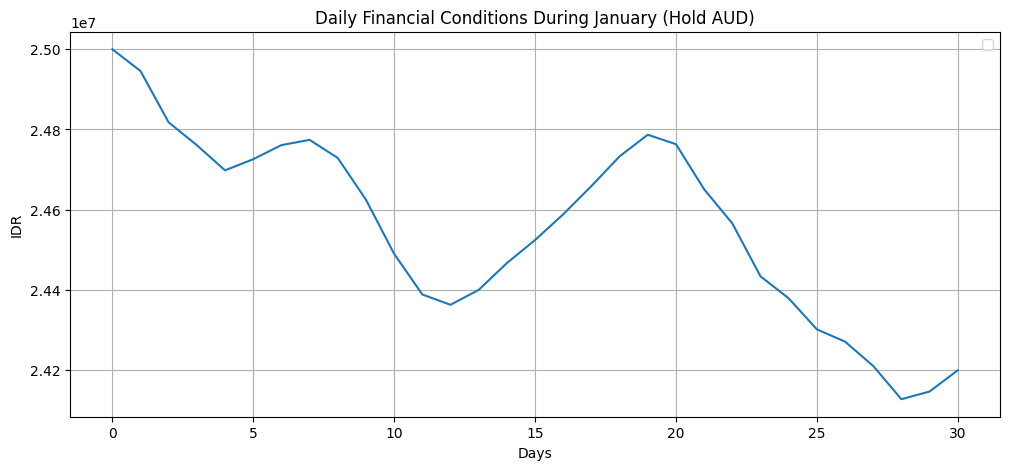

In [182]:
# Plotting financial condition
plt.figure(figsize=(12, 5))
plt.plot(idr_values)
plt.title("Daily Financial Conditions During January (Hold AUD)")
plt.xlabel("Days")
plt.ylabel("IDR")
plt.grid(True)
plt.legend()
plt.show()

In [183]:
# Output final IDR value at end of February
final_idr = idr_values[-1]
final_idr

24199944.749148082